In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
pickle_in = open("data_3class.pkl","rb")
data3 = pickle.load(pickle_in)
train_X = data3['train'][0]
train_Y = data3['train'][1]
test_X = data3['test'][0]
test_Y = data3['test'][1]

In [2]:
# initialize parameters randomly
D=2
K=3
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 1e-2

# gradient descent loop
num_examples = train_X.shape[0]
for i in range(10000):
  
    #Forward
    hidden_layer = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098486
iteration 1000: loss 1.093230
iteration 2000: loss 1.055414
iteration 3000: loss 0.903137
iteration 4000: loss 0.760708
iteration 5000: loss 0.714665
iteration 6000: loss 0.700059
iteration 7000: loss 0.691912
iteration 8000: loss 0.685265
iteration 9000: loss 0.679078


training accuracy: 0.59


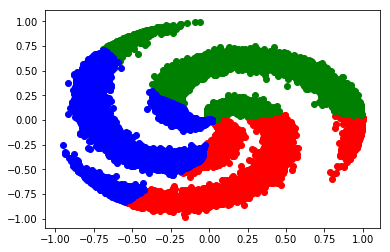

test accuracy: 0.58


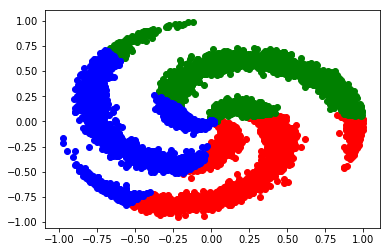

In [3]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = np.maximum(0, np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = np.maximum(0, np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()

iteration 0: loss 1.103386
iteration 1: loss 1.101500
iteration 2: loss 1.099661
iteration 3: loss 1.097844
iteration 4: loss 1.096059
iteration 5: loss 1.094280
iteration 6: loss 1.092520
iteration 7: loss 1.090804
iteration 8: loss 1.089133
iteration 9: loss 1.087494
iteration 10: loss 1.085851
iteration 11: loss 1.084207
iteration 12: loss 1.082599
iteration 13: loss 1.081027
iteration 14: loss 1.079495
iteration 15: loss 1.077991
iteration 16: loss 1.076499
iteration 17: loss 1.075014
iteration 18: loss 1.073535
iteration 19: loss 1.072058
iteration 20: loss 1.070572
iteration 21: loss 1.069076
iteration 22: loss 1.067579
iteration 23: loss 1.066070
iteration 24: loss 1.064518
iteration 25: loss 1.062891
iteration 26: loss 1.061216
iteration 27: loss 1.059542
iteration 28: loss 1.057877
iteration 29: loss 1.056211
iteration 30: loss 1.054537
iteration 31: loss 1.052851
iteration 32: loss 1.051146
iteration 33: loss 1.049417
iteration 34: loss 1.047661
iteration 35: loss 1.045875
it

iteration 287: loss 0.613120
iteration 288: loss 0.612414
iteration 289: loss 0.611706
iteration 290: loss 0.610997
iteration 291: loss 0.610287
iteration 292: loss 0.609575
iteration 293: loss 0.608863
iteration 294: loss 0.608150
iteration 295: loss 0.607435
iteration 296: loss 0.606719
iteration 297: loss 0.606002
iteration 298: loss 0.605283
iteration 299: loss 0.604564
iteration 300: loss 0.603842
iteration 301: loss 0.603120
iteration 302: loss 0.602395
iteration 303: loss 0.601669
iteration 304: loss 0.600942
iteration 305: loss 0.600213
iteration 306: loss 0.599483
iteration 307: loss 0.598751
iteration 308: loss 0.598018
iteration 309: loss 0.597284
iteration 310: loss 0.596547
iteration 311: loss 0.595810
iteration 312: loss 0.595070
iteration 313: loss 0.594330
iteration 314: loss 0.593587
iteration 315: loss 0.592843
iteration 316: loss 0.592098
iteration 317: loss 0.591351
iteration 318: loss 0.590602
iteration 319: loss 0.589852
iteration 320: loss 0.589100
iteration 321:

iteration 570: loss 0.363245
iteration 571: loss 0.362384
iteration 572: loss 0.361525
iteration 573: loss 0.360668
iteration 574: loss 0.359813
iteration 575: loss 0.358960
iteration 576: loss 0.358110
iteration 577: loss 0.357261
iteration 578: loss 0.356415
iteration 579: loss 0.355571
iteration 580: loss 0.354729
iteration 581: loss 0.353889
iteration 582: loss 0.353051
iteration 583: loss 0.352216
iteration 584: loss 0.351383
iteration 585: loss 0.350553
iteration 586: loss 0.349724
iteration 587: loss 0.348898
iteration 588: loss 0.348074
iteration 589: loss 0.347253
iteration 590: loss 0.346434
iteration 591: loss 0.345617
iteration 592: loss 0.344802
iteration 593: loss 0.343989
iteration 594: loss 0.343179
iteration 595: loss 0.342371
iteration 596: loss 0.341565
iteration 597: loss 0.340761
iteration 598: loss 0.339960
iteration 599: loss 0.339161
iteration 600: loss 0.338364
iteration 601: loss 0.337569
iteration 602: loss 0.336777
iteration 603: loss 0.335987
iteration 604:

iteration 853: loss 0.198560
iteration 854: loss 0.198188
iteration 855: loss 0.197817
iteration 856: loss 0.197447
iteration 857: loss 0.197078
iteration 858: loss 0.196710
iteration 859: loss 0.196342
iteration 860: loss 0.195976
iteration 861: loss 0.195611
iteration 862: loss 0.195246
iteration 863: loss 0.194883
iteration 864: loss 0.194520
iteration 865: loss 0.194159
iteration 866: loss 0.193798
iteration 867: loss 0.193438
iteration 868: loss 0.193080
iteration 869: loss 0.192722
iteration 870: loss 0.192366
iteration 871: loss 0.192010
iteration 872: loss 0.191655
iteration 873: loss 0.191301
iteration 874: loss 0.190948
iteration 875: loss 0.190596
iteration 876: loss 0.190245
iteration 877: loss 0.189895
iteration 878: loss 0.189546
iteration 879: loss 0.189198
iteration 880: loss 0.188851
iteration 881: loss 0.188505
iteration 882: loss 0.188160
iteration 883: loss 0.187815
iteration 884: loss 0.187472
iteration 885: loss 0.187130
iteration 886: loss 0.186789
iteration 887:

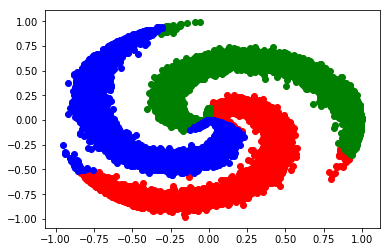

test accuracy: 0.96


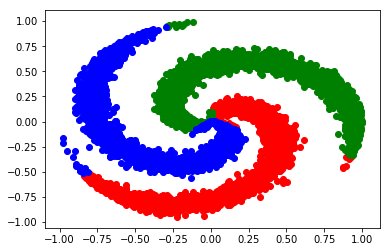

In [73]:
# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1

# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    #if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer1 = np.maximum(0, np.dot(test_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()    
    


In [58]:
pickle_in = open("data_2class.pkl","rb")
data2 = pickle.load(pickle_in)
train_X = data2['train'][0]
train_Y = data2['train'][1]
test_X = data2['test'][0]
test_Y = data2['test'][1]

iteration 0: loss 0.693204
iteration 1000: loss 0.390617
iteration 2000: loss 0.206024
iteration 3000: loss 0.177038
iteration 4000: loss 0.167560
iteration 5000: loss 0.141203
iteration 6000: loss 0.102702
iteration 7000: loss 0.077591
iteration 8000: loss 0.062822
iteration 9000: loss 0.053520
training accuracy: 0.99


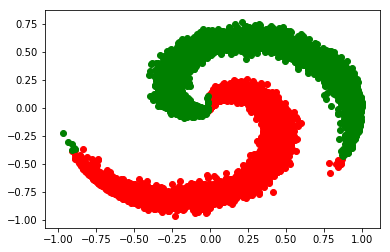

test accuracy: 0.99


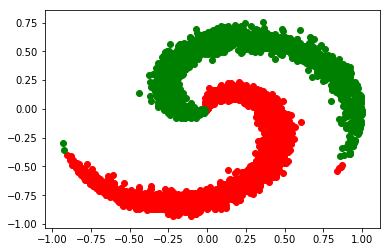

In [7]:
# initialize parameters randomly
D=2
K=2
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 1e-1

# gradient descent loop
num_examples = train_X.shape[0]
for i in range(10000):
  
    #Forward
    hidden_layer = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer = np.maximum(0, np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()

iteration 0: loss 0.702276
iteration 1: loss 0.701921
iteration 2: loss 0.701564
iteration 3: loss 0.701206
iteration 4: loss 0.700848
iteration 5: loss 0.700491
iteration 6: loss 0.700136
iteration 7: loss 0.699784
iteration 8: loss 0.699435
iteration 9: loss 0.699088
iteration 10: loss 0.698745
iteration 11: loss 0.698403
iteration 12: loss 0.698065
iteration 13: loss 0.697728
iteration 14: loss 0.697393
iteration 15: loss 0.697061
iteration 16: loss 0.696731
iteration 17: loss 0.696403
iteration 18: loss 0.696077
iteration 19: loss 0.695753
iteration 20: loss 0.695430
iteration 21: loss 0.695110
iteration 22: loss 0.694792
iteration 23: loss 0.694476
iteration 24: loss 0.694162
iteration 25: loss 0.693851
iteration 26: loss 0.693541
iteration 27: loss 0.693234
iteration 28: loss 0.692927
iteration 29: loss 0.692622
iteration 30: loss 0.692317
iteration 31: loss 0.692012
iteration 32: loss 0.691707
iteration 33: loss 0.691401
iteration 34: loss 0.691095
iteration 35: loss 0.690788
it

iteration 288: loss 0.621820
iteration 289: loss 0.621518
iteration 290: loss 0.621216
iteration 291: loss 0.620914
iteration 292: loss 0.620611
iteration 293: loss 0.620308
iteration 294: loss 0.620004
iteration 295: loss 0.619700
iteration 296: loss 0.619396
iteration 297: loss 0.619091
iteration 298: loss 0.618786
iteration 299: loss 0.618481
iteration 300: loss 0.618175
iteration 301: loss 0.617869
iteration 302: loss 0.617563
iteration 303: loss 0.617256
iteration 304: loss 0.616949
iteration 305: loss 0.616641
iteration 306: loss 0.616334
iteration 307: loss 0.616025
iteration 308: loss 0.615717
iteration 309: loss 0.615408
iteration 310: loss 0.615099
iteration 311: loss 0.614789
iteration 312: loss 0.614479
iteration 313: loss 0.614169
iteration 314: loss 0.613858
iteration 315: loss 0.613547
iteration 316: loss 0.613236
iteration 317: loss 0.612924
iteration 318: loss 0.612612
iteration 319: loss 0.612300
iteration 320: loss 0.611987
iteration 321: loss 0.611675
iteration 322:

iteration 572: loss 0.521468
iteration 573: loss 0.521084
iteration 574: loss 0.520700
iteration 575: loss 0.520316
iteration 576: loss 0.519933
iteration 577: loss 0.519550
iteration 578: loss 0.519167
iteration 579: loss 0.518784
iteration 580: loss 0.518402
iteration 581: loss 0.518020
iteration 582: loss 0.517638
iteration 583: loss 0.517256
iteration 584: loss 0.516875
iteration 585: loss 0.516494
iteration 586: loss 0.516113
iteration 587: loss 0.515733
iteration 588: loss 0.515352
iteration 589: loss 0.514972
iteration 590: loss 0.514593
iteration 591: loss 0.514213
iteration 592: loss 0.513834
iteration 593: loss 0.513455
iteration 594: loss 0.513076
iteration 595: loss 0.512697
iteration 596: loss 0.512319
iteration 597: loss 0.511941
iteration 598: loss 0.511563
iteration 599: loss 0.511185
iteration 600: loss 0.510808
iteration 601: loss 0.510431
iteration 602: loss 0.510054
iteration 603: loss 0.509677
iteration 604: loss 0.509301
iteration 605: loss 0.508924
iteration 606:

iteration 856: loss 0.433113
iteration 857: loss 0.432894
iteration 858: loss 0.432676
iteration 859: loss 0.432458
iteration 860: loss 0.432241
iteration 861: loss 0.432025
iteration 862: loss 0.431809
iteration 863: loss 0.431594
iteration 864: loss 0.431379
iteration 865: loss 0.431165
iteration 866: loss 0.430951
iteration 867: loss 0.430739
iteration 868: loss 0.430526
iteration 869: loss 0.430315
iteration 870: loss 0.430103
iteration 871: loss 0.429893
iteration 872: loss 0.429683
iteration 873: loss 0.429474
iteration 874: loss 0.429265
iteration 875: loss 0.429057
iteration 876: loss 0.428849
iteration 877: loss 0.428642
iteration 878: loss 0.428435
iteration 879: loss 0.428230
iteration 880: loss 0.428024
iteration 881: loss 0.427819
iteration 882: loss 0.427615
iteration 883: loss 0.427412
iteration 884: loss 0.427209
iteration 885: loss 0.427006
iteration 886: loss 0.426804
iteration 887: loss 0.426603
iteration 888: loss 0.426402
iteration 889: loss 0.426202
iteration 890:

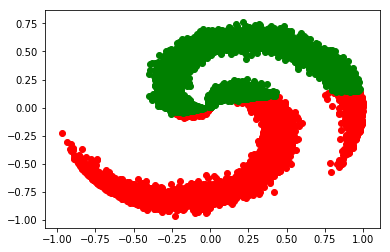

test accuracy: 0.75


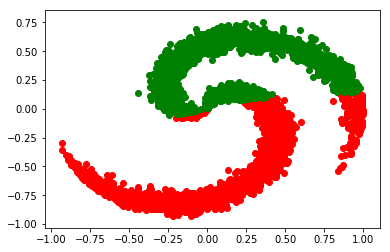

In [66]:
# initialize parameters randomly
D=2
K=2
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.01

# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation; 1*h1
    hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation; 1*h2
    scores = np.dot(hidden_layer2, W3) + b3
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    #if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)#h2*k
    db3 = np.sum(dscores, axis=0, keepdims=True)#1*k
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0
    dW2 = np.dot(hidden_layer1.T,dhidden2)#h1*h2
    db2 = np.sum(dhidden2, axis=0, keepdims=True)#1*h2
    
    # next backprop into hidden layer
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)#d*h1
    db = np.sum(dhidden1, axis=0, keepdims=True)#1*h1
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer1 = np.maximum(0, np.dot(test_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()

Error plots
3 classes, 2 fc layers


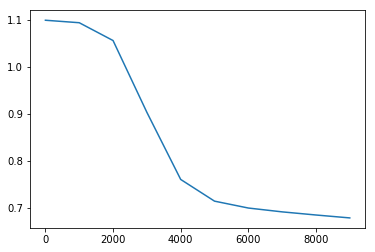

3 classes, 3 fc layers


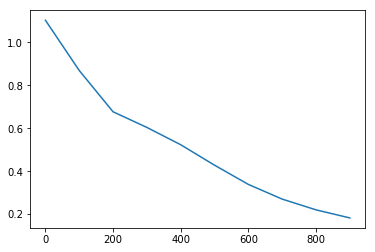

2 classes, 2 fc layers


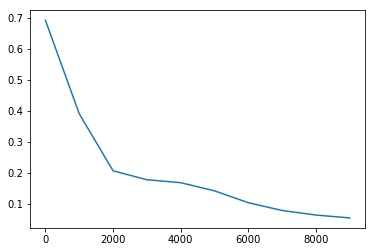

2 classes, 3 fc layers


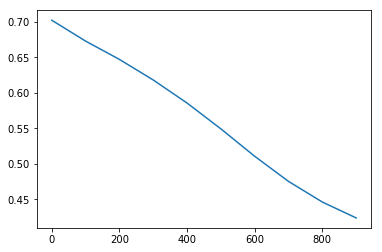

In [76]:
print("Error plots")
a = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000]
b = [0,100,200,300,400,500,600,700,800,900]
print("3 classes, 2 fc layers")
y = [1.098486,1.093230,1.055414,0.903137,0.760708,0.714665,0.700059,0.691912,0.685265,0.679078]
plt.figure()
plt.plot(a,y)
plt.show()
print("3 classes, 3 fc layers")
y = [1.103386,0.869104,0.676782,0.603842,0.523258,0.427909,0.338364,0.269913,0.219800,0.182107]
plt.figure()
plt.plot(b,y)
plt.show()
print("2 classes, 2 fc layers")
y = [0.693204,0.390617,0.206024,0.177038,0.167560,0.141203,0.102702,0.077591,0.062822,0.053520]
plt.figure()
plt.plot(a,y)
plt.show()
print("2 classes, 3 fc layers")
y = [0.702276,0.672902,0.647150,0.618175,0.585736,0.549368,0.510808,0.475419,0.446385,0.424035]
plt.figure()
plt.plot(b,y)
plt.show() 